##선형회귀

평균 기온 | 아이스크림 쇼핑 클릭량
---   |     ---
5     |       15
10    |       25
15    |       35
20    |       ?

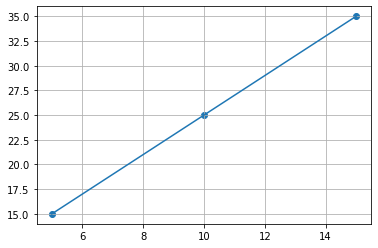

In [178]:
import numpy as np
import matplotlib.pyplot as plt

temp = np.array([5,10,15])
ice = np.array([15,25,35])

plt.plot(temp,ice)
plt.scatter(temp,ice)
plt.grid()
plt.show()

#좋은 직선을 찾는 기준, 평균 제곱근 오차(RMSE)

평균 기온($X$) | 아이스크림 쇼핑 클릭량($Y$)
---   |     ---
5     |      16
10    |       23
15    |       31
20    |       50

직선의 방정식 $f_1(X) = 2X +5$  라는 생각으로 오차를 구해보자

오차값 = 실제값($Y$) - 예측값($_f(X)$) 

In [179]:
X = np.array([5,10,15,20]) #평균기온
Y = np.array([16,23,31,50]) #실제 쇼핑 클릭량

f1_x = 2*X +5

f1_error = Y - f1_x

print(f1_error)
print(np.sum(f1_error))

[ 1 -2 -4  5]
0


 입력변수 | 예측값 | 실제값 | 오차
 --- | ---  | ---  | --- |
 5   |   15 | 16   |  1  |
 10  |   25 | 23   | -2  |
 15  |   35 | 31   | -4  |
 20  |   45 | 50   |  5  |

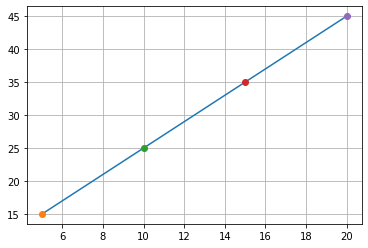

In [180]:
#그래프  - 예측지 직선 방정식
plt.plot(X,f1_x)

#오차값을 그려보자
for i in range(len(X)):
    x = np.array(X[i],X[i]) #현재온도
    y = np.array(f1_x[i],Y[i])#실제 값과 예측값
    plt.plot(x,y, marker='o')
plt.grid()
plt.show()

In [181]:
#직선의 방정식 f2(x) = 30 라고 생각할 경우 오차를 구해보자
#오차의 합은 항상 0이지만 수평의 직선은 데이터가 제대로 표현되지 못하고 있다. 

f2_x =np.full((X.shape),30)
f2_error = Y-f2_x
print(f2_error)
print(np.sum(f2_error))


[-14  -7   1  20]
0


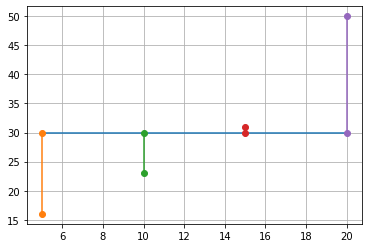

In [182]:
#그래프  - 예측지 직선 방정식
plt.plot(X,f2_x)

#오차값을 그려보자
for i in range(len(X)):
    x = np.array([X[i],X[i]]) #현재온도
    y = np.array([f2_x[i],Y[i]])#실제 값과 예측값
    plt.plot(x,y, marker='o')
plt.grid()
plt.show()

In [183]:
#f3(x) = -2x +55 라고 생각하고 오차를 구해보자
f3_x = -2*X + 55
f3_error = Y-f3_x
print(f3_error)
print(np.sum(f3_error))


[-29 -12   6  35]
0


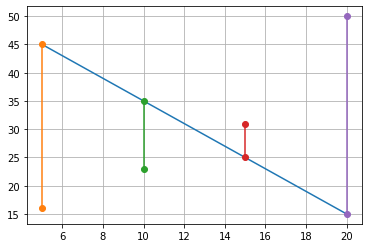

In [184]:
#그래프  - 예측지 직선 방정식
plt.plot(X,f3_x)

#오차값을 그려보자
for i in range(len(X)):
    x = np.array([X[i],X[i]]) #현재온도
    y = np.array([f3_x[i],Y[i]])#실제 값과 예측값
    plt.plot(x,y, marker='o')
plt.grid()
plt.show()

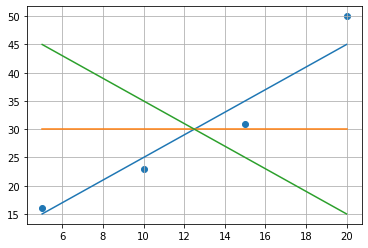

In [185]:
#3개의 직선을 모두 그ㄹ보자
plt.scatter(X,Y)
plt.plot(X, f1_x)
plt.plot(X, f2_x)
plt.plot(X, f3_x)
plt.grid()
plt.show()

정답과 예측치와의 오차의 단순 합은 모두 0으로 만들어 사용하기 때문에 어떤 공식을 적용해도 결과 데이터 혹은 데이터 표시가 어떤것이 더 좋은지 판단 할수 없다. 음수값으로 예측값 보다 실제값이 작은 값이 발생할 경우 생겨난다.

이 원인을 가지고 오차의 결과를 양수로 만들어 주는 작업을 하고 새롭게 제곱들의 평균을 구한 후 이값의 제곱근 오차를 구한다.

RMSE = Root Mean Square Error
$$
RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}{(Y_i - f(X_i))^2}}
$$

In [186]:
def RMSE(a,b,X,y):
    RMSE = np.sqrt(((y-(a*X+b))**2).mean())
    return RMSE

#처음 지정한 공식 f(x) = 2x +5 #첫번째 방식이 에러가 가장 작은값을 리턴해 주기 때문에 데이터의 특성을 가장 잘 살렸다고 파낟.
print(RMSE(2,5,X,Y))

# 두번째 지정한 공식 f(x) = 30
print(RMSE(0,30,X,Y))

# 세번째 지정한 공식 f(x) = -2x +55
print(RMSE(-2,55,X,Y))

3.391164991562634
12.708265027138834
23.695991222145572


평균제곱근오차와 같이 좋은 직선을 찾기 위해 크기를 최소화해야 하는 값에 대한 함수를 선형회귀 모델의 비용함수(Cost Function)라고 한다.
$$
f(X) = \beta_1X + \beta_0
$$
$$
Cost(\beta_0, \beta_1) = \sqrt{\frac{1}{n}\sum_{i=1}^{n}{(Y_i - f(X_i))^2}}
$$

In [187]:
#온도와 아이스크림 클릭량을 이용해서 데이터의 관계를 살펴 보자
import csv
f= open('res_ice.csv',encoding='euc-kr')
data=csv.reader(f)
header = next(data)#헤더 처리
header

temp = [] #평균 기온 데이터
ice = [] #아이스크림 클릭

for row in data:
    temp.append(float(row[1]))
    ice.append(int(row[4]))
print(temp)
print(ice)

[-2.1, -2.5, -2.1, -0.7, 0.2, -1.3, -0.5, -0.7, -2.9, 0.5, 2.1, 3.0, 1.3, 1.0, 0.9, -3.2, 0.4, 0.8, 2.9, 1.6, 0.5, 2.6, 3.1, 0.7, -0.4, -1.8, -0.2, 2.6, 0.0, 3.5, 0.3, -1.3, 2.1, 5.6, 2.5, 2.9, 5.6, 2.1, -2.0, -1.7, -1.4, -0.8, 0.1, 0.3, 0.6, 2.0, -0.3, -0.2, 2.2, 2.9, 2.8, 2.7, 3.9, 5.0, 6.1, 6.0, 5.4, 7.1, 6.8, 6.0, 6.9, 8.7, 8.8, 8.2, 8.8, 6.5, 6.1, 7.9, 7.8, 6.4, 5.8, 3.9, 5.2, 5.8, 5.8, 6.6, 7.5, 10.7, 11.4, 9.8, 5.2, 4.2, 4.7, 7.2, 10.5, 12.8, 10.6, 10.6, 7.2, 5.4, 5.7, 6.7, 7.4, 9.9, 11.7, 11.6, 12.5, 11.8, 9.3, 7.2, 8.8, 10.7, 11.6, 10.2, 11.1, 14.2, 15.5, 15.3, 12.8, 14.7, 16.5, 17.6, 16.8, 17.3, 13.5, 9.4, 11.4, 12.1, 11.3, 14.6, 15.4, 16.0, 16.7, 17.6, 18.9, 14.0, 13.9, 15.7, 17.1, 17.6, 18.5, 18.4, 17.9, 19.8, 20.3, 21.4, 21.3, 18.8, 19.5, 17.0, 17.0, 19.2, 20.9, 22.9, 23.3, 23.2, 18.6, 17.8, 19.7, 20.5, 18.6, 18.9, 20.6, 22.0, 23.1, 22.9, 21.1, 18.6, 20.1, 19.7, 18.3, 18.8, 19.7, 21.2, 20.2, 20.4, 20.2, 21.3, 21.3, 22.2, 23.4, 22.8, 21.7, 21.6, 22.5, 23.6, 21.1, 23.8, 23.6

In [188]:
#평균 기온과 아이스크림의 최대 값과 최소값을 출력해보자
print(max(temp), min(temp))
print(max(ice), min(ice))

28.8 -3.8
100 20


In [189]:
#평균 기온 값을 기준으로 도수 분포표를 생성하자
bins = np.arange(min(temp),max(temp)+5,5)

hist, bins = np.histogram(temp,bins)
print(hist, bins)

[40 63 50 49 57 80 26] [-3.8  1.2  6.2 11.2 16.2 21.2 26.2 31.2]


In [190]:
#4.평균 기온 기준으로 아이스크림 구분해서 저장 
ice_buy = np.zeros(7)

for i in range(0,len(temp)):    # 평균 기온 데이터 전체 탐색
    for j in range(0,len(bins)):
        if bins[j] <= temp[i] and temp[i] < bins[j+1]:
            ice_buy[j] = ice_buy[j] + ice[i]
print(ice_buy)

[1098. 1782. 1469. 1632. 3198. 4337. 1616.]


In [191]:
#5계급별 아이스크림 쇼핑 클릭량의 평균을 구하자.
# 평균 기온값 계급결 아이스크림 쇼핑클릭량을 구하자
ice_buy_a = np.zeros(7) #아이스크림 쇼핑 클릭량의 합을 구할 배열

for i in range(0, len(ice_buy)):
    ice_buy_a[i] = ice_buy[i]/hist[i] #계급별 아이스크림 쇼핑 클릭량의 평균
    
#아이스크림 클릭량의 평균을 소수 이하 2자리까지 출력 해보자

for i in range(0, len(ice_buy)):
    print('%.2f'% ice_buy_a[i])

27.45
28.29
29.38
33.31
56.11
54.21
62.15


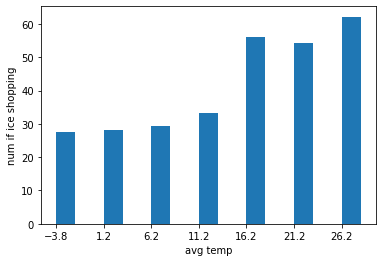

In [192]:
#6 평균 기온에 따른 아이스크림 클릭량의 평균을 막대로 그리자
plt.xlabel('avg temp')
plt.ylabel('num if ice shopping')
plt.bar(bins[0:7], ice_buy_a, width=2, align='edge')
plt.xticks(bins[0:7])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

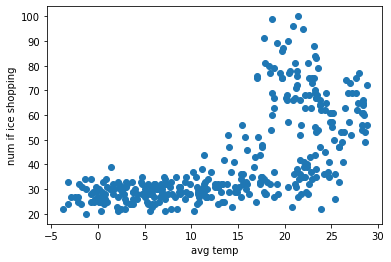

In [193]:
plt.xlabel('avg temp')
plt.ylabel('num if ice shopping')
plt.scatter(temp,ice)
plt.show

In [194]:
#7데이터 학습, 평가데이터 분류하기
#데이터로드 
import pandas as pd
df = pd.read_csv('res_ice.csv', encoding='euc-kr')
df

#학슴 데이터의 입출력 변수 나누기
data = np.array(df)
data

X = data[:,1]
y= data[:,-1]

# 비용을 계싼하고 업데이터
mean_x = np.mean(X)
mean_y = np.mean(y)

#X 변수가 가진 개수
n = len(X)

# 최소제곱법으로 기울기 절편 구하기
temp01 = 0
temp02 = 0

for i in range(n):
    temp01 += (X[i]-mean_x) *(y[i]-mean_y)
    temp02 += (X[i]-mean_x) **2
    
beta1 = temp01/temp02
beta0 = mean_y-(beta1 * mean_x)

print(f"기울기(beat1) : {beta1}, 절편(bate0) {beta0}")

기울기(beat1) : 1.3695501118896156, 절편(bate0) 22.845160616391098


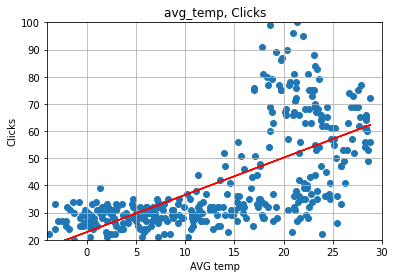

In [195]:
#시각화
Y_pred = beta0 +beta1*X
plt.title('avg_temp, Clicks')
plt.xlabel("AVG temp")
plt.ylabel("Clicks")

plt.scatter(X,y)
plt.plot(X,Y_pred, color='red')
plt.axis([-4,30,20,100])
plt.grid()
plt.show()

In [202]:
# 데이터 학습, 평가 데이터로 분리
df = pd.read_csv('res_ice.csv', encoding='euc-kr')
#df

#학습 데이터를 입력 변수, 출력 변수 나누기
data = np.array(df)
X=data[:,1]
y=data[:,-1]

# 비용을 계싼하고 업데이터
mean_x = np.mean(X)
mean_y = np.mean(y)

#X 변수가 가진 개수
n = len(X)

# 최소제곱법으로 기울기 절편 구하기
temp01 = 0
temp02 = 0

for i in range(n):
    temp01 += (X[i]-mean_x) *(y[i]-mean_y)
    temp02 += (X[i]-mean_x) **2

beta1 = temp01/temp02
beta0 = mean_y-(beta1 * mean_x)


# 오차율 - > 손실 금액 평가하기
def RMSE(beta0,beta1,x,y):
    RMSE = np.sqrt( ((y-(beta0+beta1*x)) **2).mean())
    return RMSE


res = RMSE(beta0, beta1, X,y)
print(f"손실값 결과는?{res}")

#문제 해결하기
def My_Regreesion(beta0, beta1,X):
    y_pred = beta0+ beta1 *X
    return y_pred

my_res = float(input("오늘의 기온 입력:"))

predicted_value = My_Regreesion(beta0, beta1, my_res)
print(f"오늘 아이스크림 클릭수는 100점을 기준으로 {predicted_value}")

손실값 결과는?13.932934996027768


오늘의 기온 입력: 22


오늘 아이스크림 클릭수는 100점을 기준으로 52.97526307796264


In [203]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
#res_ice.csv를 이용해서 모델링을 구현하고 예측률도 확인하고 지표도 확인해보자

#데이터 로드
df = pd.read_csv('res_ice.csv', encoding='euc-kr')
#df

#전처리
data = np.array(df)
#data

X = data[:, 1].reshape(-1,1)
y = data[:, -1].reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

#모델링 
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


#예측률
mae = mean_absolute_error(y_test, y_pred)
rmae = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'평균 절대 오차{mae}')
print(f'평균 제곱 오차{rmae}')

my_temp=float(input("안녕하세요. 오늘의 기온을 입력해 주세요. : "))
Y_pred = model.predict([[my_temp]])
print("손실값 결과는? {0}".format(Y_pred))

In [249]:
#자료 병합
import seaborn as sns

df = sns.load_dataset('titanic')
df
tt = pd.read_csv('train.csv')

rdf = df.drop(['deck','embark_town'], axis =1)
ndf = rdf[['survived',	'pclass',	'sex',	'age',	'sibsp',	'parch','embarked']]

gender = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf,gender], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
onehot_embarked

ndf = pd.concat([ndf, onehot_embarked], axis = 1)
ndf.drop(['sex','embarked'],axis=1, inplace=True)

tt.columns = map(str.lower, tt.columns)
tt.columns

df2 =pd.concat([ndf,tt['name']], axis=1)
df2

,survived,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S,name
0,0,3,22.0,1,0,0,1,0,0,1,"Braund, Mr. Owen Harris"
1,1,1,38.0,1,0,1,0,1,0,0,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,1,3,26.0,0,0,1,0,0,0,1,"Heikkinen, Miss. Laina"
3,1,1,35.0,1,0,1,0,0,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,0,3,35.0,0,0,0,1,0,0,1,"Allen, Mr. William Henry"
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,0,1,0,0,1,"Montvila, Rev. Juozas"
887,1,1,19.0,0,0,1,0,0,0,1,"Graham, Miss. Margaret Edith"
888,0,3,NaN,1,2,1,0,0,0,1,"Johnston, Miss. Catherine Helen ""Carrie"""
889,1,1,26.0,0,0,0,1,1,0,0,"Behr, Mr. Karl Howell"
